In [1]:
from pandas_profiling import ProfileReport

In [42]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [3]:
os.chdir("files used or created in the process")

In [4]:
os.listdir()

['advertising.csv',
 'Advertizing_report.html',
 'ai4i2020.csv',
 'ai4i2020.log',
 'ai4i__test_cases.csv',
 'Boxcoxed_ai4i.csv',
 'myfirstmodel.sav',
 'predictive_maintenance.sav',
 'predictive_maintenance_report.html',
 'standardized_ai4i.csv']

In [5]:
df1 = pd.read_csv("advertising.csv")
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
df1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
pr = ProfileReport(df1)

In [8]:
pr.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pr.to_file("Advertizing_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**reshape(-1,1):**

**-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis. E.g,
If you have an array of shape (2,4) then reshaping it with (-1, 1), then the array will get reshaped in such a way that the resulting array has only 1 column and this is only possible by having 8 rows, hence, (8,1).**

In [9]:
x = df1[["TV"]]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [10]:
y = df1[['Sales']]
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_mod = LinearRegression()

In [13]:
lin_mod.fit(x,y)

LinearRegression()

## finding the accuracy of the model:

lin_mod.score(x, y)

In [14]:
lin_mod.score(x, y)

0.8121757029987414

**Nothing but:<br><br> sales = m\*TV + c**

In [15]:
lin_mod.intercept_ # c

array([6.97482149])

In [16]:
lin_mod.coef_ # m

array([[0.05546477]])

In [17]:
### Now lets's save our model:
file = "myfirstmodel.sav"

pickle.dump(lin_mod, open(file, 'wb'))

In [18]:
df1.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [19]:
### Let's predict:

lin_mod.predict([[232.1]])

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.84819471]])

In [20]:
lin_mod.predict([[232]])

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.84264824]])

In [21]:
### prediction for the mean val of expense in TV advertizement:
lin_mod.predict([[147.0425]])

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15.1305]])

In [22]:
expense_for_tv_sales = [122,324,453,23042,2083,2342,4242,34343,234324,2321] # dollars

prediction_ = [lin_mod.predict([[i]]) for i in expense_for_tv_sales] 
prediction_

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

[array([[13.74152349]]),
 array([[24.94540712]]),
 array([[32.10036251]]),
 array([[1284.99406265]]),
 array([[122.50793838]]),
 array([[136.87331393]]),
 array([[242.25637782]]),
 array([[1911.80143372]]),
 array([[13003.701697]]),
 array([[135.70855375]])]

In [23]:
### To load the model we've just saved:

saved_mod = pickle.load(open(file, 'rb'))

In [24]:
saved_mod.predict([[234]])

C:\Program Files\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.95357778]])

### Accuracy of our model:

In [29]:
saved_mod.score(x,y)*100

### Although to test the accuracy we are obliged to pass the different dataset,
# but since it's the first class lets go with anyway.

81.21757029987414

## Multiple Regression: 

Instead of one single feature column we get to build our model with multiple feature columns.

In [75]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Lets Regress against sales with multiple feature columns viz. TV. Radio and newspaper; and Compare the accuracies in both cases.

## \# Feature Selection:

**i.** Compare the **m** of the concerned vals.<br>
**ii.** Compare the R-squared vals or you can say **Impact Analysis**.<br>
**iii.** Compare the **p-values** from the statistical analyis of the model and then determine which feature to drop.<br>
**iv.** Compare the **adjusted R-squared** vals.<br>

In [78]:
features_x = df1[['TV','Radio','Newspaper']]
label_y  = df1[['Sales']]

lm = LinearRegression()

lm.fit(features_x, label_y)

LinearRegression()

In [37]:
### Accuracy:

lm.score(features_x, label_y)

0.9025912899684558

**Finding**: It's evident from the accuracy vals in both the cases that if we happen to pick multiple feature columns, the model will be that much reliable.

In [38]:
lm.coef_

array([[0.05444578, 0.10700123, 0.00033566]])

It also clarifies that which feature columns are best to pick on the basis of their coefficients because here feature newspaper is making negligible difference as compared to the others. Thus, it can be said that our model accuracy won't falter that much if we happen to neglect the newspaper feature.<br><br>Lets try that out..

In [77]:
features_x2 = df1[['TV','Radio']]
features_x2

lm2 = LinearRegression()
lm2.fit(features_x2, label_y)

# the model accuracy when the Newspaper is omitted:
lm2.score(features_x2, label_y)

0.9025896186081139

In [79]:
print("Features: TV, Radio and Newspaper: Accuracy: ", lm.score(features_x, label_y))
print("Newspaper Omitted: Accuracy: ", lm2.score(features_x2, label_y))

Features: TV, Radio and Newspaper: Accuracy:  0.9025912899684558
Newspaper Omitted: Accuracy:  0.9025896186081139


**__>** not much of the difference I see.<br><br>
**__>** The thing we just pulled out is nothing but **Impact analysis** to do the **feature selection**.

## \# Adjusted R^2: (a significant way of doing feature selection)

In [46]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Either we could simply consider cases with differences in columns and compare their **R-squared** (as we've been doing up till now) or we could just use **Statistical approach to the model** and then do the same.

**Statistical Approach to the model:**

In [81]:
import statsmodels.formula.api as smf

# ols: ordinary least square
lm2 = smf.ols(formula = 'Sales ~ Newspaper', data=df1).fit()
lm2.summary()

# Not to get your expectations high!
### We won't get any physical model to productionize by this approach.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Tue, 23 Aug 2022   Prob (F-statistic):             0.0255
Time:                        14:33:25   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9595      0.638     21.870      0.000      12.701      15.218
Newspaper      0.0383      0.017      2.251      0.025       0.005       0.072
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.808
Skew:                          -0.111   Prob(JB):                       0.0903
Kurtosis:                       2.273   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note**: Anyway, if your software displays a p values of 0, it means the null hypothesis is rejected and your test is statistically significant.

### \# Analysis of OLS approach model:
Now, we want to test if the coefficients from the linear regression function has a significant impact on the dependent variable (Sales).

This means that we want to prove that if there exists a relationship between feature TV and Sales, using statistical tests.

There are four components that explains the statistics of the coefficients:

- **std err stands for Standard Error**
- **t is the "t-value" of the coefficients**
- **P>|t| is called the "P-value"**
-  **[0.025  0.975] represents the confidence interval of the coefficients**

### \# p-value:

**The p-value is a statistical number to conclude if there is a relationship between Newspaper and Sales.**

We test if the true value of the coefficient is equal to zero (no relationship). The statistical test for this is called Hypothesis testing.

- A low P-value (< 0.05) means that the coefficient is likely not equal to zero i.e. there's some sort of relationship.
- A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable (here: if Newspaper affects Sales)i.e. to say we accept the null-hypothesis.
- A high P-value is also called an insignificant P-value.

In [74]:
lm2 = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data=df1).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           8.13e-99
Time:                        09:32:14   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
### Check the p-val of the newspaper.

# p-val: 0.954
### Null Hypothesis: no relation between Newspaper and Sales.
### Since it's greater than 0.05 that means our null hypothesis is True.
### thus, it goes w/o saying that we can drop the Newspaper featue.

In [73]:
# If we were to neglect the Newspaper feature

lm2 = smf.ols(formula = 'Sales ~ TV+Radio', data=df1).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Tue, 23 Aug 2022   Prob (F-statistic):          2.39e-100
Time:                        09:18:00   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
##                    # R^2  #adjusted R^2                  

# Newspaper:          0.025, 0.020
# TV:                 0.812, 0.811
# TV+Radio:           0.903, 0.902
# TV+Radio+Newspaper: 0.903, 0.901

**R-squared:** Accuracy of the model. **Statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.**
<br><br>
**Note:** If R-squared would be increasing if we add one additional feature column, **we would feel that our model accuracy is increasing** but that's not the case because if we add the column that has zero to negligile effect on our dependent variable, there is no way in the hell that our model accuracy will be increasing.<br>This demonstrates that **R-squared ain't the reliable metric.**<br><br>That's exactly where **Adjusted R-squared** is introduced.

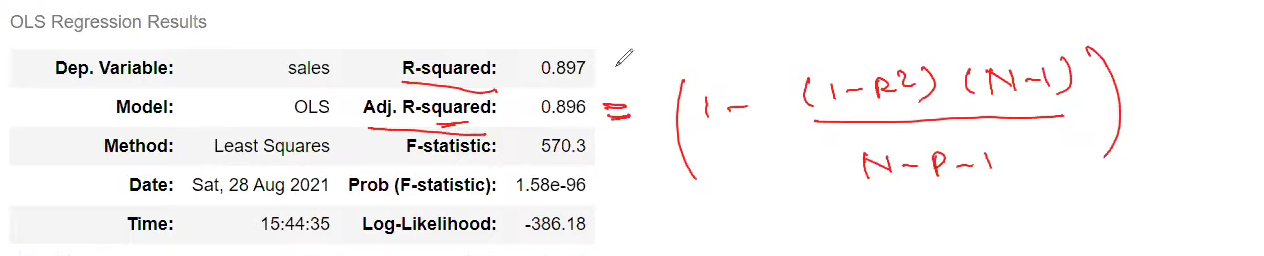

where n = number of rows,<br>
and p = number of predictors

**__>** As afore-mentioned, by default **R-squared** would be increasing with the increase in the number of predictors and would eventually give us **over-fitted model**.<br><br>
***But the adjusted R-squared ain't like that. It says "Bruh! I'll be taking care of even the number of predictors as well as the number of rows. I won't let that kid R-squared have his fucking way."***

## \# A way of checking Multicollinearity: 
**(apart from Pearson coefficient stuff and similar ones)**

### VIF (Variance Inflation Factor):

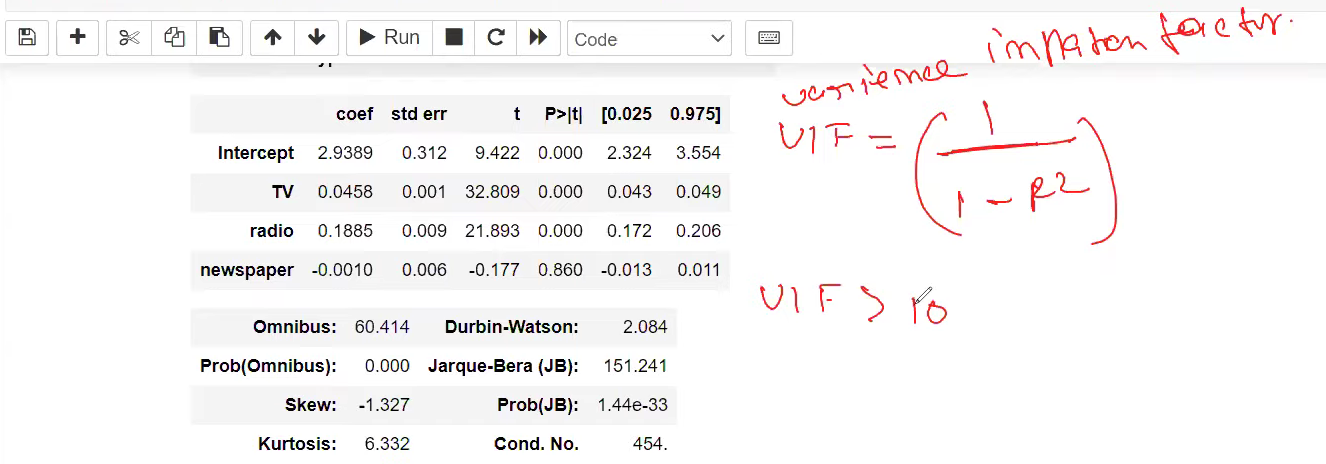

In [ ]:
### If V > 10 then, the concerned features are highly Collinear i.e to say that R-squared > 0.9

**Over-fitted Model:** The model which at the time of training gives more than 90% accuracy and fails to do so with the testing. That is something called an **Over-confident or Over-fitted model**.